# **Feature Engineering for Machine Learning**

**Today's Outline:**
- Data Preprocessing & Feature Engineering Basics
- Feature Scaling & Transformation
- Feature Encoding (Categorical Data)
- Feature Cleaning & Imputation
- Data Splitting

==========

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## Feature Engineering (Data Pre-processing)

Scikit-Learn Preprocessing Module:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing 

### Data Preprocessing & Feature Engineering Basics

In [ ]:
from IPython.display import Image
Image("imgs/feature-engineering.jpeg")

- Feature Scaling & Transformation
    - Normalization
    - Standardization
- Feature Encoding (Categorical Data)
    - Label Encoding
    - One-Hot Encoding
- Feature Cleaning & Imputation
    - Outliers
    - Missing Data

### Importing Dataset

In [3]:
df = pd.read_csv('feature_data.csv')

In [4]:
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [5]:
df = df[['Age','Salary','Region','Purchased']]
df

,Age,Salary,Region,Purchased
0,35.0,3000.0,Asia,No
1,34.0,12000.0,Africa,Yes
2,28.0,7000.0,Africa,No
3,45.0,8500.0,Europe,No
4,38.0,45000.0,Africa,Yes
5,NaN,NaN,Asia,Yes
6,26.0,6700.0,Asia,No
7,33.0,10500.0,Asia,Yes
8,18.0,NaN,Africa,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        8 non-null      float64
 1   Salary     7 non-null      float64
 2   Region     9 non-null      object 
 3   Purchased  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 420.0+ bytes


In [7]:
df.select_dtypes(include=['float64'])
# df.select_dtypes(exclude=['float64'])

,Age,Salary
0,35.0,3000.0
1,34.0,12000.0
2,28.0,7000.0
3,45.0,8500.0
4,38.0,45000.0
5,NaN,NaN
6,26.0,6700.0
7,33.0,10500.0
8,18.0,NaN


### Features Scaling & Transformation

- Normalization (*sklearn.preprocessing.MinMaxScaler*)
- Standardization (*sklearn.preprocessing.StandardScaler*)

In [8]:
from IPython.display import Image
Image("imgs/std-norm.png")

FileNotFoundError: No such file or directory: 'imgs/std-norm.png'

FileNotFoundError: No such file or directory: 'imgs/std-norm.png'

<IPython.core.display.Image object>

##### Normal Distribution

In [9]:
ages = pd.read_csv('data/ages.csv')
ages

FileNotFoundError: [Errno 2] No such file or directory: 'data/ages.csv'

In [10]:
plt.figure(figsize=(10,5))
plt.bar(ages['Ages'],ages['Frequency'], width=1)

NameError: name 'ages' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
from IPython.display import Image
Image("imgs/standard-normal-distribution.png")

##### Normalization / Scaling (sklearn.preprocessing.MinMaxScaler)

In [ ]:
from IPython.display import Image
Image("imgs/rescaling.gif")

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [11]:
df

,Age,Salary,Region,Purchased
0,35.0,3000.0,Asia,No
1,34.0,12000.0,Africa,Yes
2,28.0,7000.0,Africa,No
3,45.0,8500.0,Europe,No
4,38.0,45000.0,Africa,Yes
5,NaN,NaN,Asia,Yes
6,26.0,6700.0,Asia,No
7,33.0,10500.0,Asia,Yes
8,18.0,NaN,Africa,No


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()

In [15]:
sc.fit(df[['Salary']])

MinMaxScaler()

In [16]:
sc.transform(df[['Salary']])#baet maben 0 w 1

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

In [17]:
sc.fit_transform(df[['Salary']])#bt3ml el coden eli fo2eha m3 b3d

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

##### Standardization (sklearn.preprocessing.StandardScaler)

In [ ]:
from IPython.display import Image
Image("imgs/normalizing.gif")

In [ ]:
from IPython.display import Image
Image("imgs/standardization.gif")

In [ ]:
from IPython.display import Image
Image("imgs/std.png")

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler() # a7afz 3al m3ayer eli 3ndi a5od kol qyma w atr7ha mn rl mtwst bta3ha 3la el standard

In [20]:
sc.fit(df[['Salary']])

StandardScaler()

In [21]:
sc.transform(df[['Salary']])

array([[-0.77372619],
       [-0.09388309],
       [-0.4715737 ],
       [-0.35826652],
       [ 2.39887492],
       [        nan],
       [-0.49423514],
       [-0.20719028],
       [        nan]])

In [58]:
PD=sc.fit_transform(df[['Salary']])
PD

array([[-1.71173738],
       [ 1.4005124 ],
       [-0.32851525],
       [ 0.19019304],
       [-0.43225691],
       [ 0.8818041 ]])

### Encoding Categorical Features

- Label / Integer Encoding (*sklearn.preprocessing.LabelEncoder*)
- One-Hot / Dummy Encoding (*sklearn.preprocessing.OneHotEncoder*)

##### Label / Integer Encoding (sklearn.preprocessing.LabelEncoder)

In [ ]:
from IPython.display import Image
Image("imgs/labelencoding.png")

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [23]:
df

,Age,Salary,Region,Purchased
0,35.0,3000.0,Asia,No
1,34.0,12000.0,Africa,Yes
2,28.0,7000.0,Africa,No
3,45.0,8500.0,Europe,No
4,38.0,45000.0,Africa,Yes
5,NaN,NaN,Asia,Yes
6,26.0,6700.0,Asia,No
7,33.0,10500.0,Asia,Yes
8,18.0,NaN,Africa,No


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
enc = LabelEncoder()

In [26]:
enc.fit_transform(df['Purchased'])

array([0, 1, 0, 0, 1, 1, 0, 1, 0])

In [27]:
enc.fit_transform(df['Region'])

array([1, 0, 0, 2, 0, 1, 1, 1, 0])

##### One-Hot / Dummy Encoding (sklearn.preprocessing.OneHotEncoder)

In [ ]:
from IPython.display import Image
Image("imgs/onehotencoding.png")

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [28]:
df

,Age,Salary,Region,Purchased
0,35.0,3000.0,Asia,No
1,34.0,12000.0,Africa,Yes
2,28.0,7000.0,Africa,No
3,45.0,8500.0,Europe,No
4,38.0,45000.0,Africa,Yes
5,NaN,NaN,Asia,Yes
6,26.0,6700.0,Asia,No
7,33.0,10500.0,Asia,Yes
8,18.0,NaN,Africa,No


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
enc = OneHotEncoder()

In [31]:
enc.fit_transform(df[['Purchased']]).toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [32]:
enc.fit_transform(df[['Region']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [33]:
pd.get_dummies(df['Region'])

,Africa,Asia,Europe
0,False,True,False
1,True,False,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False
6,False,True,False
7,False,True,False
8,True,False,False


### Features Cleaning & Imputation

- Missing Data
- Outliers

##### Handling Missing Data

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        8 non-null      float64
 1   Salary     7 non-null      float64
 2   Region     9 non-null      object 
 3   Purchased  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 420.0+ bytes


In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imp = SimpleImputer()

In [37]:
imp.fit_transform(df[['Salary']])

array([[ 3000.        ],
       [12000.        ],
       [ 7000.        ],
       [ 8500.        ],
       [45000.        ],
       [13242.85714286],
       [ 6700.        ],
       [10500.        ],
       [13242.85714286]])

In [38]:
from sklearn.impute import MissingIndicator #el fady 3ndi feen bzbt zy is null kda

In [39]:
miss = MissingIndicator()

In [40]:
df[miss.fit_transform(df[['Salary']])]

,Age,Salary,Region,Purchased
5,NaN,NaN,Asia,Yes
8,18.0,NaN,Africa,No


##### Dealing with Outliers

In [ ]:
from IPython.display import Image
Image("imgs/outliers.gif")

<Axes: ylabel='Frequency'>

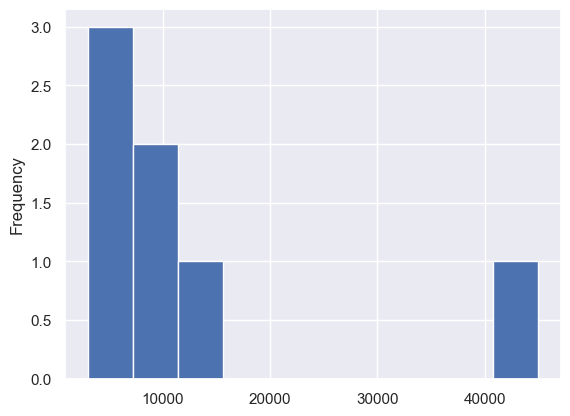

In [41]:
df['Salary'].plot.hist(bins=10)

<Axes: >

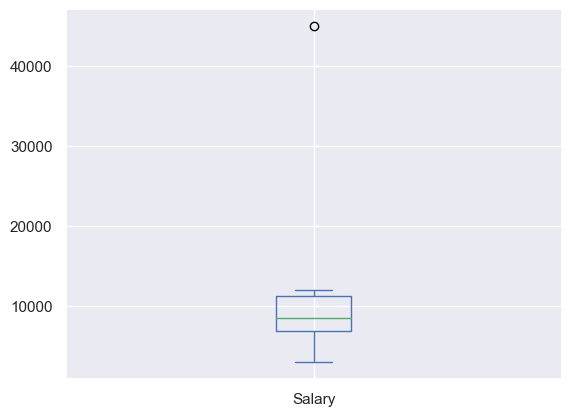

In [42]:
df['Salary'].plot.box()

In [43]:
q1 = df['Salary'].quantile(0.25)

In [44]:
q3 = df['Salary'].quantile(0.75)

In [45]:
iqr = q3 - q1
iqr

4400.0

In [46]:
lower = q1 - 1.5 * iqr
lower

250.0

In [47]:
upper = q3 + 1.5 * iqr
upper

17850.0

In [48]:
df = df[(df['Salary'] >= lower) & (df['Salary'] <= upper)]
df

,Age,Salary,Region,Purchased
0,35.0,3000.0,Asia,No
1,34.0,12000.0,Africa,Yes
2,28.0,7000.0,Africa,No
3,45.0,8500.0,Europe,No
6,26.0,6700.0,Asia,No
7,33.0,10500.0,Asia,Yes


<Axes: ylabel='Frequency'>

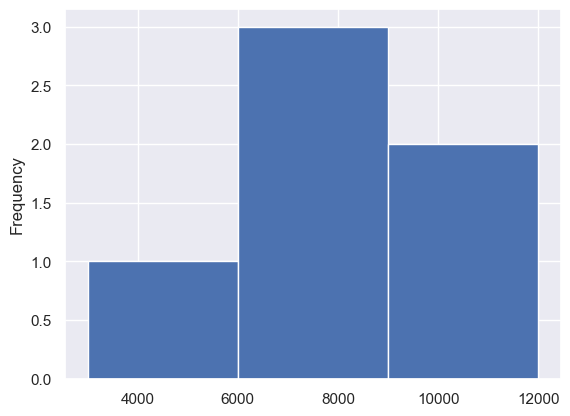

In [49]:
df['Salary'].plot.hist(bins=3)

<Axes: >

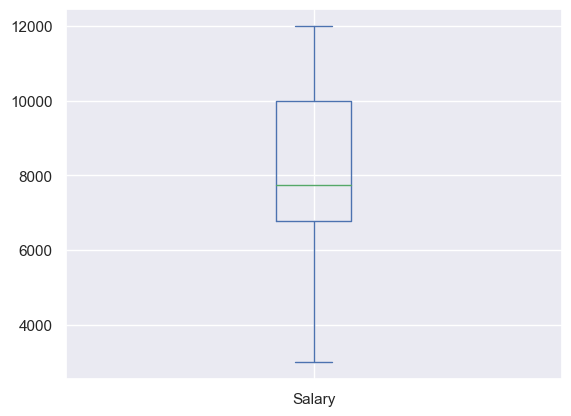

In [50]:
df['Salary'].plot.box()

### Splitting Data for Training & Testing

##### What is a Feature?

In [ ]:
from IPython.display import Image
Image("imgs/features.png")

##### Splitting Data for Testing & Training

In [ ]:
from IPython.display import Image
Image("imgs/splitting.png")

In [60]:
from sklearn.model_selection import train_test_split

In [65]:
iris.data #qym el x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [67]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [72]:
iris.target #qym el y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()

In [70]:
X, y = iris.data, iris.target

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [74]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [75]:
y_train


array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [77]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [78]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

===========

# THANK YOU!